# Harmonic Oscillator

## Motivation

Molecules absorb energy in a variety of ways.  If the incident energy is in the infrared, molecules absorb energy in their internal vibrational modes.  Here we will look at a very simplistic quantum mechanical perspective on harmonic bond stretching in a molecule. 

## Learning Goals:

After working through these notes, you will be able to:

1. Describe how a harmonic oscillator can be used to describe diatomic molecular vibration
2. Map the 2D problem to a 1D problem
3. Write out the quantum mechanical Hamiltonian operator for the harmonic oscillator.
4. Identify and use Hermite polynomials.
5. Identify and use the wave function solutions for the Harmonic oscillator.

## Coding Concepts:

The following coding concepts are used in this notebook:

1. [Variables](../../coding_concepts/variables.ipynb)
2. [Functions](../../coding_concepts/functions.ipynb)
3. [Plotting with matplotlib](../../coding_concepts/plotting_with_matplotlib.ipynb)

## Statememt of the Problem

Consider two masses, $m_1$ and $m_2$, connected by a spring with force constant $k$.  The masses are allowed to oscillate under the force of this spring and at temperature $T$.  Compute the energy of this spring using both classical and quantum mechanics. 

This approximation can be considered as a second order Taylor series truncation of the potential energy around the minimum for a diatomic molecule.  Below I plot the energy of H$_2$ as a function of internuclear separation (in black) along with the harmonic/parabolic approximation taking into account the minimum and surrounding $\sim$ 12 points.  

From the plot below we can see that the harmonic approximation is ok at/near the minimum but quickly becomes a poor approximation for the molecular potential.

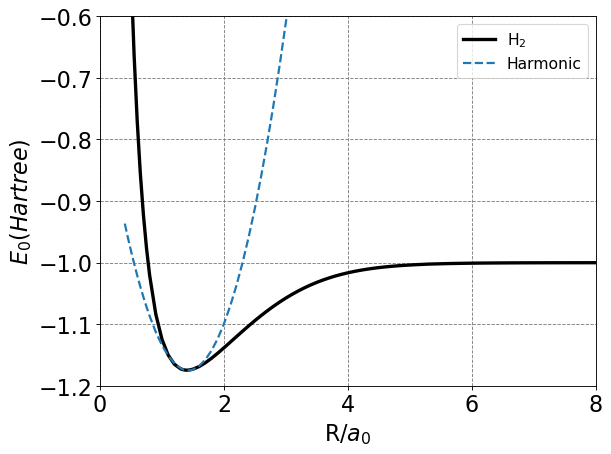

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
fig, ax = plt.subplots(figsize=(8,6),dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both',labelsize=20)
plt.grid( which='major', axis='both', color='#808080', linestyle='--')
ax.set_xlabel(r'R/$a_0$',fontsize=20)
ax.set_ylabel(r'$E_0 (Hartree)$',fontsize=20)
exact = np.loadtxt("h2_kolos_wolniewicz.txt",skiprows=1)
ax.plot(exact[:,0],exact[:,1],'-',lw=3,c='k',label=r'H$_2$')
# fit the well to a parabola
min_arg = np.argmin(exact[:,1])
delta = 6
x = exact[min_arg-delta:min_arg+delta,0]
y = exact[min_arg-delta:min_arg+delta,1]
X = np.column_stack((x**2,x))
reg = LinearRegression().fit(X, y)
def parab(x,coef,intercept):
    return coef[0]*x*x + coef[1]*x + intercept
ax.plot(exact[:,0],parab(exact[:,0],reg.coef_,reg.intercept_),'--',lw=2,label="Harmonic")
ax.set_ylim(-1.2,-0.6)
ax.set_xlim(0,8)
ax.legend(fontsize=14);

## Mapping to a 1D Problem

While this initially looks like a two (or higher) dimensional problem because the energy will depend on the positions of the two masses, it can be readily mapped to a one dimensional problem.  Certainly, we can hopefully recognize that the potential energy of the spring will depend on displacement of the spring.  In one dimension this can be written as 
\begin{equation}
V(x_2-x_1) = \frac{1}{2}k\left( (x_2-x_1) - l_0\right)^2
\end{equation}
where $x_1$ and $x_2$ are the positions of the particles, $k$ is the force constant of the spring connecting the two particles, and $l_0$ is the rest position/displacment of the spring.  This is the standard Hooke potential energy for a spring.  

Clearly we can set $x=x_2-x+1-l_0$ and get a one dimensional potential energy that just depends on the displacement from equilibrium, $x$, of the spring. The issue is that we also need to describe the kinetic energy which, one first pass, would seem to require defining velocities of both particles
\begin{equation}
K(v_1,v_2) = \frac{1}{2}m_1v_1^2 + \frac{1}{2}m_2v_2^2
\end{equation}

To see how we can rewrite this as a one-dimensional problem, recognize that the force on particle 1 and 2 can be written as
\begin{align}
F_1 &= m_1\frac{d^2x_1}{dt^2} = -k(x_2-x_1-l_0) \\
F_2 &= m_2\frac{d^2x_2}{dt^2} = k(x_2-x_1-l_0) 
\end{align}
where we have used $F = ma$ and $F = \frac{d V}{dx}$ in both equations.  If we divide both equations by their masses and then subtract one from the other we get
\begin{align}
\frac{d^2x_1}{dt^2} - \frac{d^2x_2}{dt^2} &= -\frac{k}{m_1}(x_2-x_1-l_0) - \frac{k}{m_2}(x_2-x_1-l_0) \\
=\frac{d^2}{dt^2}(x_1-x_2) &= -k \left( \frac{1}{m_1} + \frac{1}{m_2}\right)(x_2-x_1-l_0)
\end{align}
Now we define a reduced mass, $\mu$, with the following equation 
\begin{equation}
\frac{1}{\mu} = \frac{1}{m_1} + \frac{1}{m_2} = \frac{m_1+m_2}{m_1m_2}
\end{equation}
and substitute $x=x_2-x_1-l_0$ to get
\begin{align}
\frac{d^2x}{dt^2} &= -\frac{k}{\mu} x \\
\Rightarrow \mu\frac{d^2x}{dt^2} &= -kx
\end{align}
This final equation implies that the force due to a spring of potential $\frac{1}{2}kx^2$ has a a mass $\mu$ and acceleration dependent on its displacement coordinate $x$.  

In summary, we can treat the harmonic oscillation of two particles as a single particle moving in a Hookean potential of a single coordinate.

## Classical Mechanics

This is a one dimensional problem with a mass $\mu$ on a spring at temperature $T$.  We can express the energy of such a system using classical mechanics as:

$E(x,v) = K(v) + V(x) = \frac{1}{2}\mu v^2 + \frac{1}{2}kx^2$

The energy $E(x,v)$ is a continuous quantity and thus the energy emitted or absorbed by a classical harmonic oscillator will be a continuum.  

## Quantum Mechanics

Much like in the case of classical mechanics, we must define the energy of the system for quantum mechanics.  The Hamiltonian is defined as the kinetic energy operator plus the harmonic potential operator  

$\hat{H} = \hat{K} + \hat{V} = -\frac{\hbar^2}{2\mu}\frac{d^2}{dx^2} + \frac{1}{2}kx^2 = \frac{\hat{P}^2}{2\mu} + \frac{k}{2}\hat{X}^2$.

Note that we have introduced the reduced mass, $\mu$, instead of the mass, $m$.  This is to make the problem applicable to situations like a diatomic molecule in which case we must deal with the reduced mass of the molecule rather than the mass of a single particle. 

We now plug this into the Schrodinger equation:

$\hat{H}\psi(x) = E\psi(x)$

$\left(\frac{\hat{P}^2}{2\mu} + \frac{k}{2}\hat{X}^2\right)\psi(x) = E \psi(x)$.

We need to solve the above equation for $\psi(x)$ and $E$.  This is not as easy as the Particle in a Box situation - as in we cannot just come up with functions that are solutions of the above equation.  There are at least two ways to solve this problem analytically.  This is a differential equation and different forms of these equations are solved in different ways.  In this case, there is a (sometimes referred to as elegant) operator solution that we will go through to get $\psi(x)$ and $E$.

### The Differential Equation Approach

The Schrodinger equation can be written as
\begin{align}
&-\frac{\hbar^2}{2\mu}\frac{d^2\psi}{dx^2} +\frac{1}{2}kx^2\psi(x) = E\psi(x) \\
\Rightarrow & \frac{d^2\psi}{dx^2} + \frac{2\mu}{\hbar^2}\left(E-\frac{1}{2}kx^2\right)\psi(x) = 0 
\end{align}

This differential equation can be solved by the power series solution.  I will not go through the details here but rather just present the results:

\begin{equation}
\psi_v(x) = N_vH_v\left(\alpha^{1/2}x\right)e^{-\alpha x^2/2}
\end{equation}

where $\alpha = \sqrt{\frac{k\mu}{\hbar^2}}$, $N_v = \frac{1}{\sqrt{2^vv!}}\left(\frac{\alpha}{\pi}\right)^{1/4}$ is the normalization constant, and $H_v\left(\alpha^{1/2}x\right)$ is the $v$th Hermite polynomial with argument $\alpha^{1/2}x$.  The first few Hermite polynomials are

| $H_0(x) = 1$ | $H_1(x) = 2x$ | $H_2(x) = 4x^2-2$ |
| :--------- | :---------- | :-------------- |
| $H_3(x) = 3x^3-12x$ | $H_4(x) = 16x^4-48x^2+12$ | $ H_5(x) = 32x^5-160x^3+120x$ |

Hermite polynomials can be generating using the following equation

$H_n(x) = (-1)^ne^{x^2}\frac{d^n}{dx^n}\left(e^{-x^2}\right)$

### The Ladder Operator Derivation

The following "derivation" will follow closely that given in the Appendix of Chapter 5 of McQuarrie "Quantum Chemistry" second edition.  We start by defining two new operators $\hat{p}$ and $\hat{x}$ as

$\hat{p} = (\mu\hbar\omega)^{-1/2}\hat{P}$,

$\hat{x} = (\mu\hbar\omega)^{1/2}\hat{X}$

These allow us to write the Hamiltonian as

$\hat{H} = \frac{\hbar\omega}{2}(\hat{p}^2+ \hat{x}^2) $.



We now define two new operators (non-Hermitian)

$\hat{a}_+ = \frac{1}{\sqrt{2}}(\hat{x}-i\hat{p})$, 

$\hat{a}_- = \frac{1}{\sqrt{2}}(\hat{x}+i\hat{p})$.

Using these definitions,

$\hat{a}_+\hat{a}_- = \frac{1}{2}(\hat{x}-i\hat{p})(\hat{x}+i\hat{p}) = \frac{1}{2}\left[ \hat{x}^2 + i(\hat{p}\hat{x}-\hat{x}\hat{p}) + \hat{p}^2\right] = \frac{1}{2}(\hat{x}^2 + \hat{p}^2 + 1)$

and 

$\hat{a}_-\hat{a}_+ = \frac{1}{2}(\hat{p}^2 + \hat{x}^2 - 1)$.

Note that this implies $[\hat{a}_+,\hat{a}_-] = -1$ (these operators do not commute).  Other important commutation relations of these operators are

$[\hat{a}_+\hat{a}_-,\hat{a}_+] = \hat{a}_+$

and 

$[\hat{a}_+\hat{a}_-,\hat{a}_-] = -\hat{a}_-$.

The Hamiltonian can now be written in terms of $\hat{a}_+$ and $\hat{a}_-$ as

$\hat{H} = \hbar\omega\left(\hat{a}_+\hat{a}_- + \frac{1}{2}\right)$.

At this juncture all we have done is rewrite the Hamiltonian in terms of operators $\hat{a}_+$ and $\hat{a}_-$.  Let's investigate some of the properties of these operators by manipulating the Schrodinger equation

$\hat{H}|\nu\rangle = \hbar \omega \left(\hat{a}_+\hat{a}_- + \frac{1}{2}\right)|\nu\rangle = E_\nu|\nu\rangle $.

Now left multiply by $\hat{a}_-$

$\hbar \omega \left(\hat{a}_-\hat{a}_+\hat{a}_- + \frac{\hat{a}_-}{2}\right)|\nu\rangle = \hbar \omega \left(\hat{a}_-\hat{a}_+ + \frac{1}{2}\right)\hat{a}_-|\nu\rangle = E_\nu\hat{a}_-|\nu\rangle $.

Notice that, inside the parantheses of the middle term we have $\hat{a}_-\hat{a}_+$ not $\hat{a}_+\hat{a}_-$ as it is in the Hamiltonian.  We can, however, plug in $\hat{a}_-\hat{a}_+=\frac{1}{2}(\hat{x}^2 + \hat{p}^2 + 1)$ and rearrange to get back the original Hamiltonian.  We start by plugging in for $\hat{a}_-\hat{a}_+$

$\hbar \omega \left(\hat{a}_-\hat{a}_+ + \frac{1}{2}\right)|\hat{a}_-\nu\rangle = \frac{\hbar\omega}{2}(\hat{p}^2+\hat{x}^2+2)|\hat{a}_-\nu\rangle = E_\nu|\hat{a}_-\nu\rangle $.

Now we almost have the Hamiltonian on the left hand side but just need to subtract $\hbar\omega$ from both sides to get:

$\frac{\hbar\omega}{2}(\hat{p}^2+\hat{x}^2)|\hat{a}_-\nu\rangle = \hat{H}|\hat{a}_-\nu\rangle = (E_\nu-\hbar\omega)|\hat{a}_-\nu\rangle $.

Note that this equation tells us that $|\hat{a}_-\nu\rangle$ is an eigenfunction of $\hat{H}$ that has an eigenvalue of $E_\nu-\hbar\omega$.  This means that state $|\hat{a}_-\nu\rangle$ has an energy that is one unit of $\hbar\omega$ less than the energy of $|\nu\rangle$.  Thus we must have

$|\hat{a}_-\nu\rangle \propto |\nu-1\rangle$.

Similarly, it can be shown that

$|\hat{a}_+\nu\rangle \propto |\nu+1\rangle$.

We have as of yet only rewritten the Hamiltonian in terms of the ladder operators and shown properties of the ladder operators.  We still need to determine the energies and wavefunctions of Schrodinger equation for this problem.  It should be noted, however, that having rewritten the Hamiltonian in terms of ladder operators, eigenfunctions and energies of the Hamiltonian are also eigenfunctions and values of the operator $\hat{a}_+\hat{a}_-$.  We start our investigation of this operator by invesigating $\hat{a}_-|\nu\rangle$.  We note that there must be a minimum $\nu$ such that

$\hat{a}_-|\nu_{min}\rangle = 0$.

If we multiply the above equation by $\hat{a}_+$ we get

$\hat{a}_+\hat{a}_-|\nu_{min}\rangle = 0 = n_{min}|\nu_{min}\rangle$.

Thus, $n_{min}=0$, or the lowest quantum state of the Harmonic oscillator is $n=0$.  It can be shown that repeated applications of the raising operator $\hat{a}_+$ on the above equation give $n=0,1,2,...$.  

$[\hat{a}_+\hat{a}_-,\hat{a}_+]|\psi_n\rangle = \hat{a}_+|\psi_n\rangle$

$\Rightarrow \hat{a}_+\hat{a}_-\hat{a}_+|\psi_n\rangle - \hat{a}_+\hat{a}_+\hat{a}_-|\psi_n\rangle = \hat{a}_+|\psi_n\rangle$

$\Rightarrow \hat{a}_+\hat{a}_-\hat{a}_+|\psi_n\rangle  = \hat{a}_+\hat{a}_+\hat{a}_-|\psi_n\rangle + \hat{a}_+|\psi_n\rangle$

$\Rightarrow \hat{a}_+\hat{a}_-\hat{a}_+|\psi_n\rangle  = (n+1)\hat{a}_+|\psi_n\rangle$

Plugging this result into the Hamiltonian expression above gives

$E_n = \hbar\omega\left(n+\frac{1}{2}\right)$.

Now for the wavefunctions.  We start with 

$\hat{a}_-|\psi_0\rangle = 0$.  

We now plug in the expression for $\hat{a}_-$ to get

$\frac{1}{\sqrt{2}}(\hat{x}+i\hat{p})\psi_0 = 0$.

If we distribute $\psi_0$ and rearrange we get

$ -\hat{x}\psi_0 = i\hat{p}\psi_0$.

Plugging in for $\hat{x}$ and $\hat{p}$ we now get

$ -\frac{\mu\omega}{\hbar}x\psi_0 = \frac{d\psi_0}{dx}$.

The solution to this equation is

$\psi_0(x) = ce^{-\mu\omega x^2/2\hbar}$.

The remaining Hermite polynomials can be derived but we will not do so.  We refer to the general solution above for these.

### A Graphical Depiction of the Quantum Harmonic Ocillator

What do these solutions look like?  Below I plot the first eight energy levels of a quantum harmonic oscillator and the corresponding wave functions.

Notice a few things from this plot:

1. The energy spacing for a harmonic oscillator are constant.
2. The wave functions are very similar to sine functions inside the harmonic well. 
3. Increasing the vibrational quantum number by one incurs one additional node in the wave function.  
4. The wave functions can take on finite values outside of the parabola indicating the value of the potential energy at a given $x$.

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

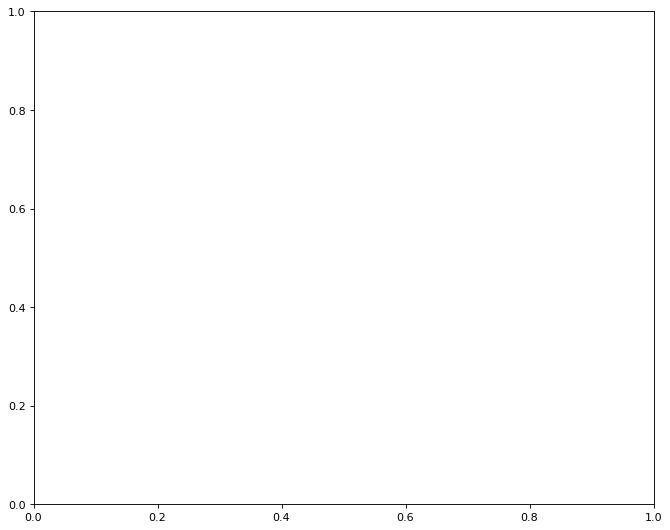

In [2]:
# let's plot the energy levels and wave functions
import numpy as np
import matplotlib.pyplot as plt
def define_figure(xlabel="X",ylabel="Y"):
    # setup plot parameters
    fig = plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='k')
    ax = plt.subplot(111)
    ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
    ax.set_xlabel(xlabel,size=20)
    ax.set_ylabel(ylabel,size=20)
    plt.tick_params(axis='both',labelsize=20)
    return ax
from scipy.special import hermite
from scipy.special import factorial
from scipy import integrate
# start by defining N function
def Nn(n,alpha):
    return 1/np.sqrt(2**n*factorial(n))*(alpha/np.pi)**0.25

# initialize a figure
ax = define_figure(xlabel="$x$",ylabel="$V(x)$")
hbar = 1.0
omega = 2*np.pi
alpha = omega/np.pi
x = np.arange(-np.pi/2.0,np.pi/2.0,0.01)
x2 = np.power(x,2)
U = 0.5 * (omega)**2 * x**2
ax.plot(x, U, 'k')
A = 2
for n in range(8):
    # compute and plot energy levels
    evals = hbar*omega*(n+0.5)
    mask = np.where(evals > U)  
    ax.plot(x[mask], evals * np.ones(np.shape(x))[mask], 'k--')
    # compute and plot wavefunctions
    psi =A * (-1)**n*Nn(n,alpha)*hermite(n)(np.sqrt(alpha)*x)*np.exp(-alpha*x2/2.0)
    Y = psi+evals  # shift wavefunction up in Y to be at energy level
    label = "n="+str(n)
    mask = np.where(Y > U-2.0)
    ax.plot(x[mask], Y[mask].real,label=label)
plt.legend(fontsize=18)

In [2]:
import numpy as np
print(np.sqrt(2/np.sqrt(np.pi))*40**(3/8))
print(np.sqrt(40)/2)

4.236429918083399
3.1622776601683795


In [7]:
alpha = np.sqrt(40)
x = -0.829
x2 = x*x
n = 1
print(Nn(n,alpha)*hermite(n)(np.sqrt(alpha)*x)*np.exp(-alpha*x2/2.0))

-0.3996919829284159
